In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [132]:
df = pd.read_csv("21-housing.csv")

In [133]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [134]:
import math
def plot_all_histograms(df, title_prefix = ""):
    num_cols = df.select_dtypes(include=[np.number]).columns
    n_cols = 3
    n_rows = math.ceil(len(num_cols) / n_cols)

    plt.figure(figsize = (5 * n_cols, 4 * n_rows))
    for i, col in enumerate(num_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f"{title_prefix}{col}")
        plt.xlabel("")
        plt.ylabel("")

    plt.tight_layout()
    plt.show()

In [135]:
df["total_bedrooms"] = df["total_bedrooms"].fillna(df["total_bedrooms"].median())
df = df.drop("ocean_proximity", axis=1)

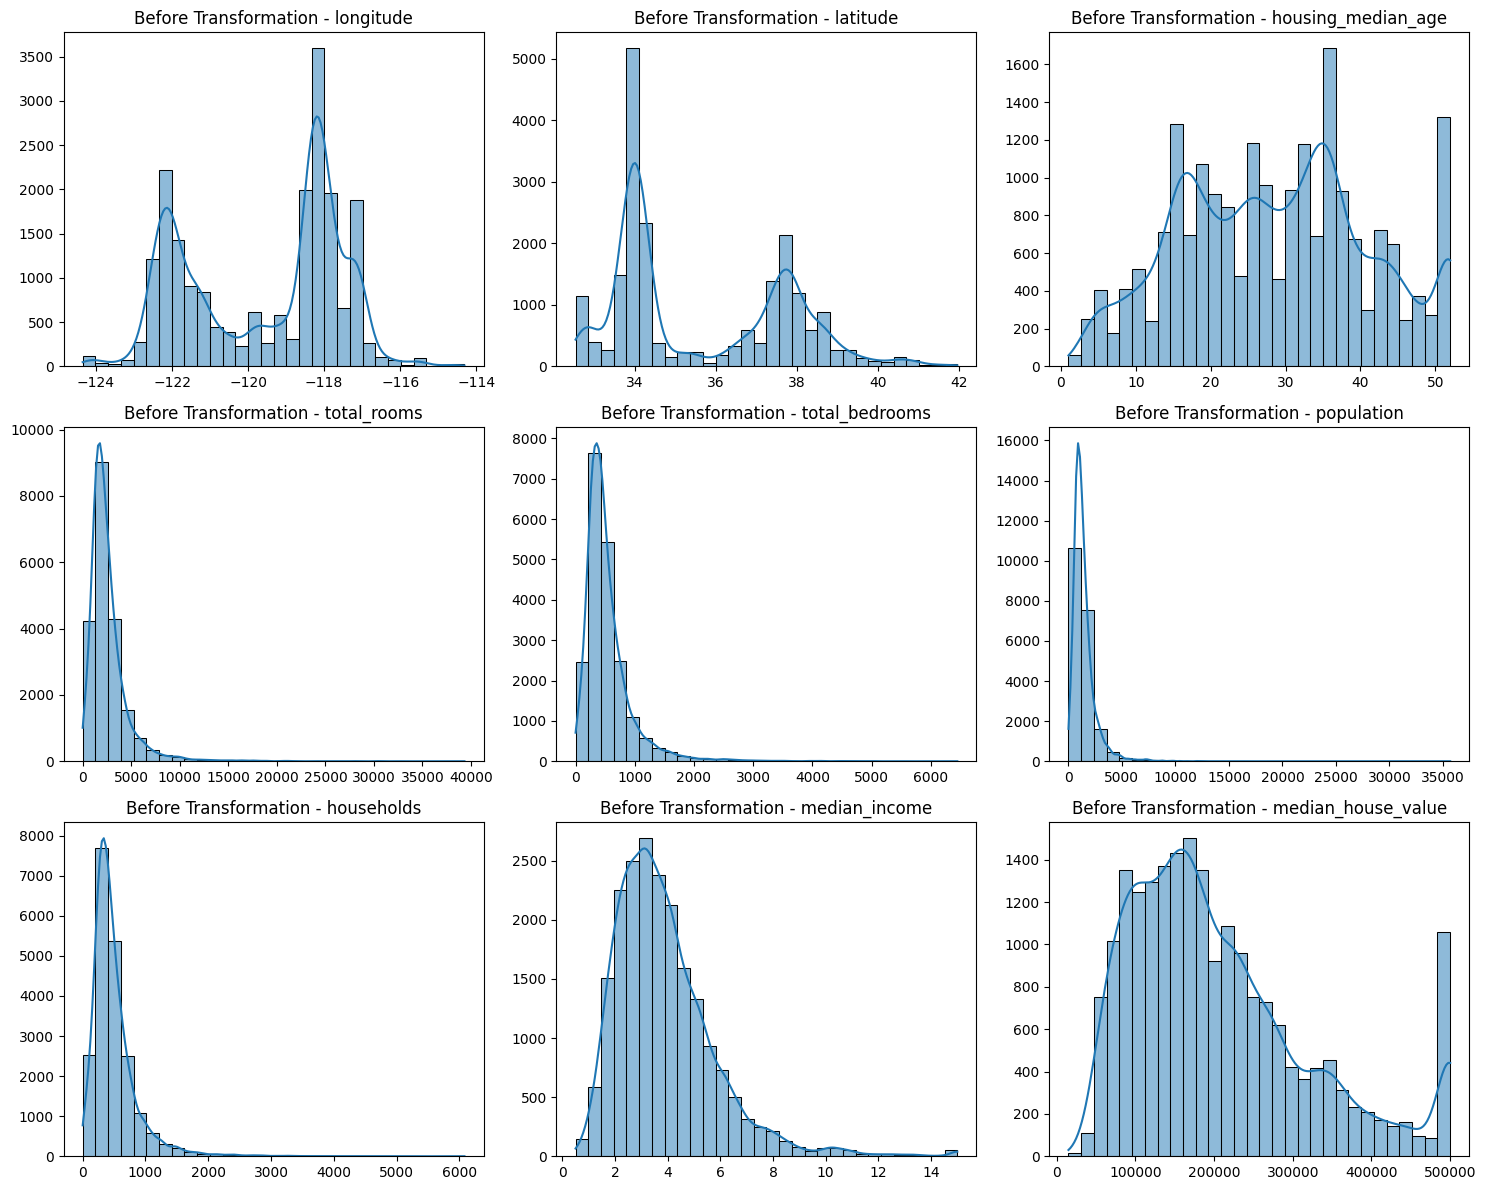

In [136]:
plot_all_histograms(df, title_prefix = "Before Transformation - ")

In [137]:
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

In [138]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [139]:
from sklearn.preprocessing import PowerTransformer
pt_X = PowerTransformer( method = "yeo-johnson" )

X_train_transformed = pt_X.fit_transform(X_train)
X_test_transformed = pt_X.transform(X_test)

In [140]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [141]:
columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns = columns )

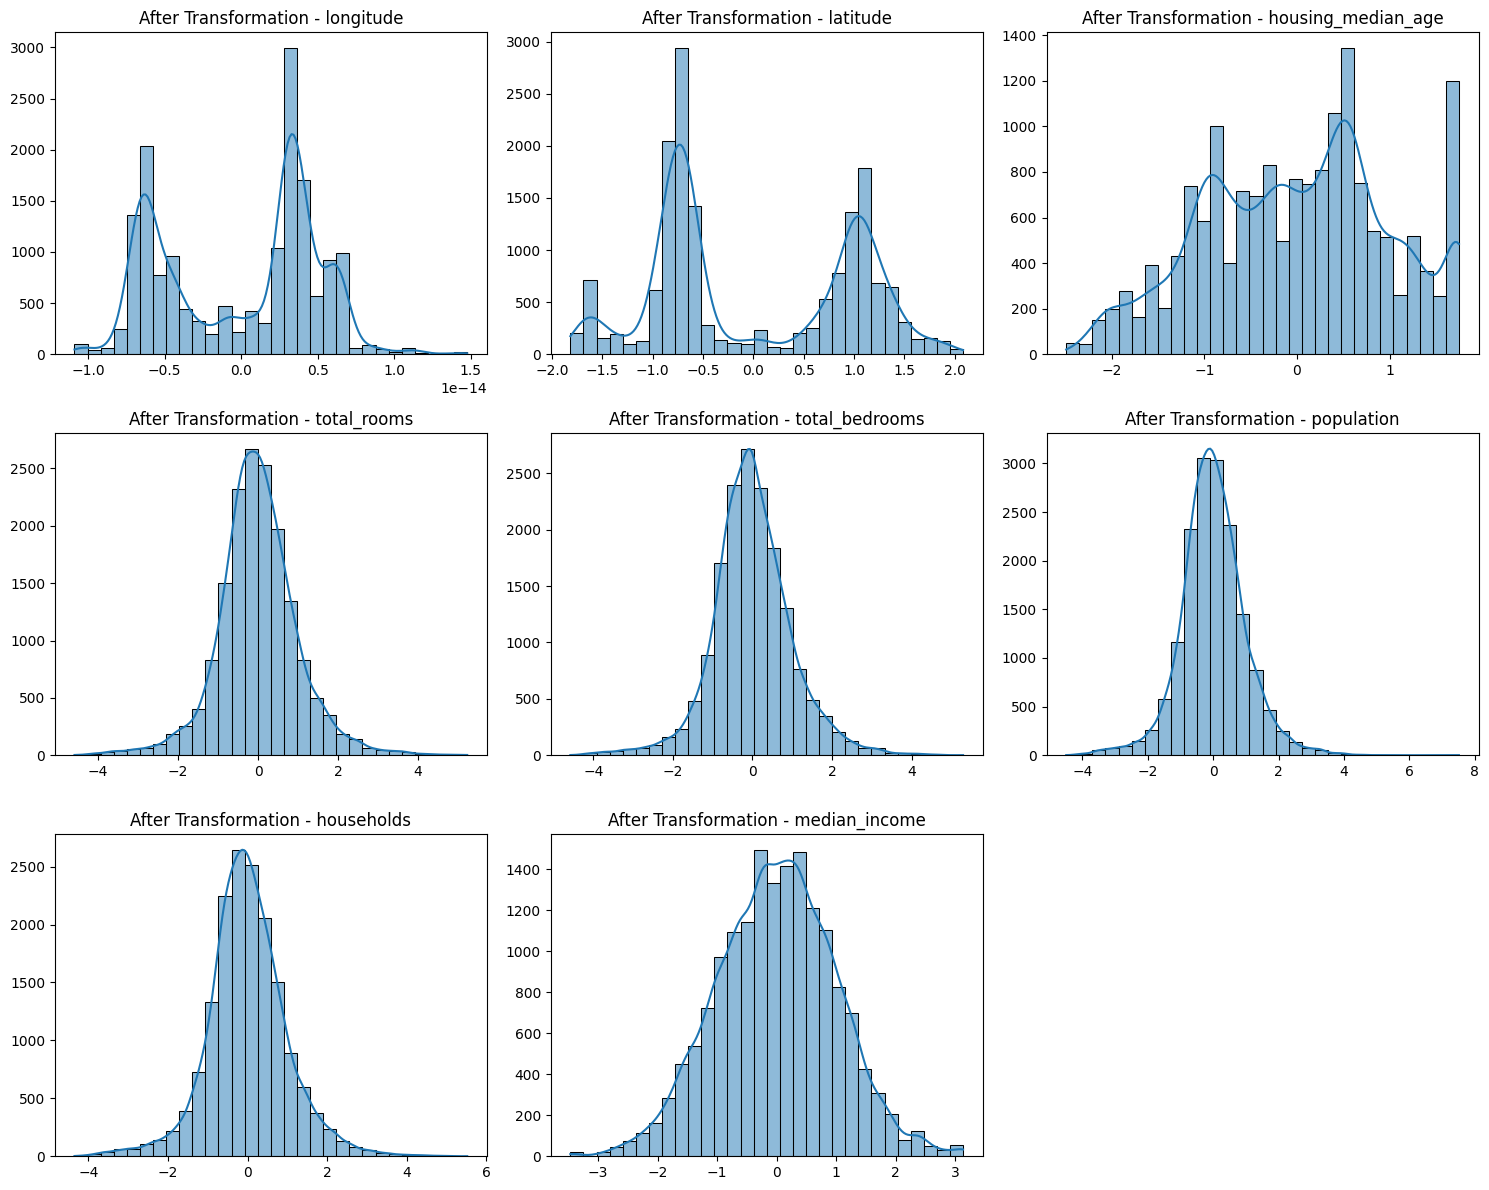

In [142]:
plot_all_histograms(X_train_transformed_df, title_prefix = "After Transformation - ")

In [143]:
from xgboost import XGBRegressor

In [144]:
model = XGBRegressor()
model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [145]:
y_pred = model.predict(X_test)

In [146]:
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(y_pred, y_test ))
print(r2_score(y_pred, y_test ))

2319697876.850824
0.7930734437225955


In [147]:
# transformation

In [148]:
from scipy.stats import boxcox
y_train_transformed, lambda_y=boxcox(y_train)
model = XGBRegressor(random_state=15)
model.fit(X_train_transformed, y_train_transformed)
y_pred_transformed = model.predict(X_test_transformed)

In [149]:
def inverse_boxcox(y, lambda_):
    if lambda_ == 0:
        return np.exp(y)
    else:
        return np.power(y * lambda_ +1, 1 / lambda_)

In [150]:
y_pred_original = inverse_boxcox(y_pred_transformed, lambda_y)

In [151]:
print(mean_squared_error( y_test,y_pred_original))
print(r2_score( y_test,y_pred_original))

2403626358.273366
0.8192362848925988
